Stock Moving Averages Analysis

Inspiration from these:

https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/

https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/

In [19]:
import pandas as pd
import quandl
import datetime
import numpy as np

In [20]:
quandl.ApiConfig.api_key = '-sU_5Scxy4pALKKfAhPg'
quandl.ApiConfig.api_version = '2015-04-09'

In [21]:
# Set timeframe, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()
print ("Today's Date = "+ str(end))
print ("Starting date of analysis =" + str(start))

Today's Date = 2019-03-06
Starting date of analysis =2016-01-01 00:00:00


In [36]:
s = "AAPL"
apple = quandl.get("WIKI/" + s, start_date=start, end_date=end)
apple.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


In [32]:
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
s = "AAPL"
apple = quandl.get("WIKI/PRICES", ticker=[s])
 
type(apple)
1
pd.core.frame.DataFrame
1
apple.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,AAPL,2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0
1,AAPL,2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2,AAPL,2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
3,AAPL,2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
4,AAPL,2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0


In [25]:
data = quandl.get_table('ZACKS/FC', ticker='AAPL')
data.tail()

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,per_fisc_year,...,stock_based_compsn_qd,cash_flow_oper_activity_qd,net_change_prop_plant_equip_qd,comm_stock_div_paid_qd,pref_stock_div_paid_qd,tot_comm_pref_stock_div_qd,wavg_shares_out,wavg_shares_out_diluted,eps_basic_net,eps_diluted_net
None,,,,,,,,,,,,,,,,,,,,,
35,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2017-12-31,Q,None,2018,...,1296.0,28293.0,-2810.0,-3339.0,None,-3339.0,5112.877,5157.787,3.92,3.89
36,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2018-03-31,Q,None,2018,...,1348.0,15130.0,-4195.0,-3190.0,None,-3190.0,5024.877,5068.493,2.75,2.73
37,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2018-06-30,Q,None,2018,...,1351.0,14488.0,-3267.0,-3653.0,None,-3653.0,4882.167,4926.609,2.36,2.34
38,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2018-09-30,Q,None,2018,...,1345.0,19523.0,-3041.0,-3530.0,None,-3530.0,4955.377,5000.109,2.98,2.95
39,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,2018-12-31,Q,None,2019,...,1559.0,26690.0,-3355.0,-3568.0,None,-3568.0,4735.820,4773.252,4.22,4.18


Populating the interactive namespace from numpy and matplotlib


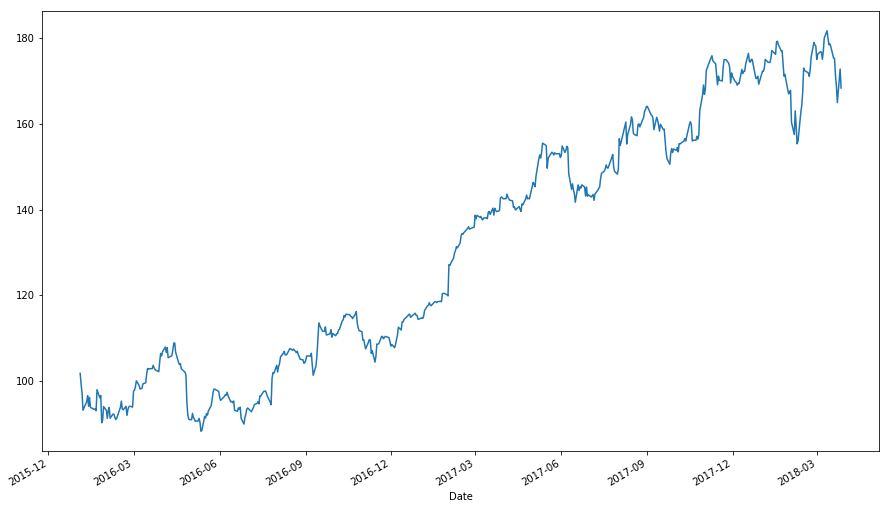

In [6]:
import matplotlib.pyplot as plt

# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
apple["Adj. Close"].plot() # Plot the adjusted closing price of AAPL

In [58]:
microsoft, google, micron = (quandl.get("WIKI/" + s, start_date=start, end_date=end) for s in ["MSFT", "GOOG", "MU"])
 
# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": apple["Adj. Close"],
                      "MSFT": microsoft["Adj. Close"],
                      "GOOG": google["Adj. Close"],
                      "MU": micron["Adj. Close"]})
 
stocks.tail()

,AAPL,MSFT,GOOG,MU
Date,,,,
2018-03-21,171.270,92.48,1090.88,61.07
2018-03-22,168.845,89.79,1049.08,58.97
2018-03-23,164.940,87.18,1021.57,54.21
2018-03-26,172.770,93.78,1053.21,55.56
2018-03-27,168.340,89.47,1005.10,52.40


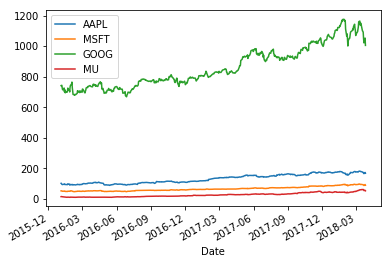

In [21]:
stocks.plot()

In [22]:
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head() - 1

,AAPL,MSFT,GOOG,MU
Date,,,,
2016-01-04,0.000000,0.000000,0.000000,0.000000
2016-01-05,-0.025059,0.004562,0.000998,0.034194
2016-01-06,-0.044139,-0.013686,0.002399,-0.007676
2016-01-07,-0.084480,-0.047993,-0.020827,-0.046755
2016-01-08,-0.079639,-0.045073,-0.036895,-0.069784


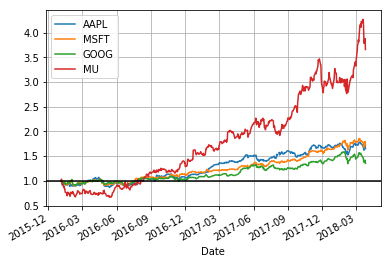

In [23]:
stock_return.plot(grid = True).axhline(y = 1, color = "black")

In [24]:
# Let's use NumPy's log function, though math's log function would work just as well
import numpy as np
 
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,AAPL,MSFT,GOOG,MU
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.025379,0.004552,0.000997,0.033622
2016-01-06,-0.019764,-0.018332,0.001400,-0.041328
2016-01-07,-0.043121,-0.035402,-0.023443,-0.040178
2016-01-08,0.005274,0.003062,-0.016546,-0.024455


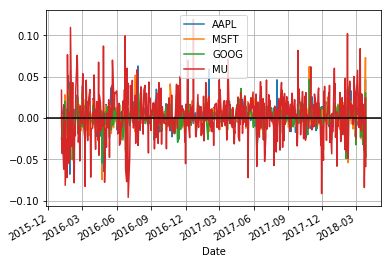

In [25]:
stock_change.plot(grid = True).axhline(y = 0, color = "black")

In [57]:
stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages
stock_change_apr.tail()

,AAPL,MSFT,GOOG,MU
Date,,,,
2018-03-21,-577.463148,-176.499833,-157.285338,-32.989695
2018-03-22,-359.355133,-743.873619,-984.592233,-881.796062
2018-03-23,-589.663945,-743.366326,-669.637836,-2120.918858
2018-03-26,1168.762361,1839.012005,768.649993,619.872740
2018-03-27,-654.582257,-1185.615651,-1178.241231,-1475.634549


In [63]:
tbill = quandl.get("FRED/TB3MS", start_date=start, end_date=end)
tbill.tail()

,Value
Date,
2018-09-01,2.13
2018-10-01,2.25
2018-11-01,2.33
2018-12-01,2.37
2019-01-01,2.37


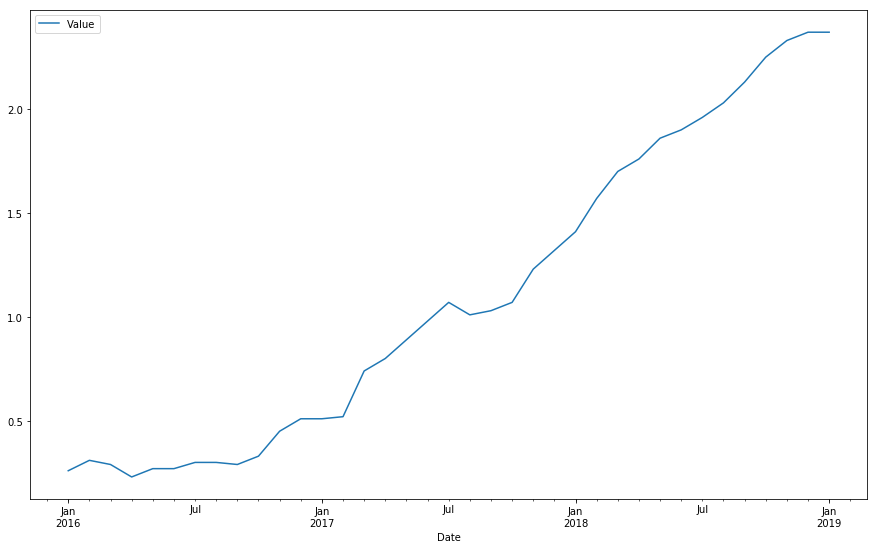

In [64]:
tbill.plot()

In [65]:
#Get the Risk Free rate
rrf = tbill.iloc[-1, 0]    # Get the most recent Treasury Bill rate
rrf

2.37

In [66]:
#create 20d moving average
apple["20d"] = np.round(apple["Adj. Close"].rolling(window = 20, center = False).mean(), 2)
apple.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,20d
Date,,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0,176.94
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0,176.76
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0,176.23
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0,175.92
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0,175.41


In [67]:
#create 50d and 200d moving averages
apple["50d"] = np.round(apple["Adj. Close"].rolling(window = 50, center = False).mean(), 2)
apple["200d"] = np.round(apple["Adj. Close"].rolling(window = 200, center = False).mean(), 2)

In [68]:
apple['20d-50d'] = apple['20d'] - apple['50d']
apple.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,20d,50d,200d,20d-50d
Date,,,,,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0,176.94,172.57,162.68,4.37
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0,176.76,172.46,162.75,4.30
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0,176.23,172.27,162.81,3.96
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0,175.92,172.22,162.91,3.70
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0,175.41,172.05,162.98,3.36


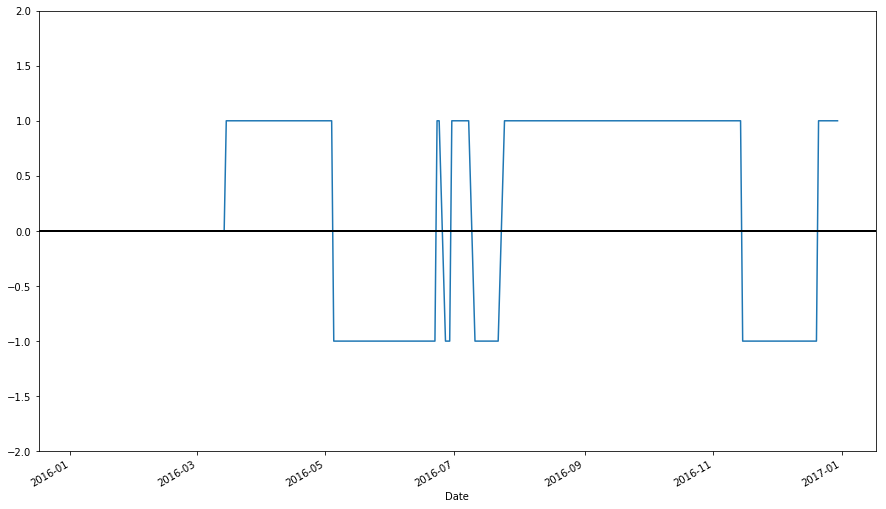

In [69]:
# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
apple["Regime"] = np.where(apple['20d-50d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
apple["Regime"] = np.where(apple['20d-50d'] < 0, -1, apple["Regime"])
apple.loc['2016-01-04':'2016-12-31',"Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)